In [54]:
import time
import random
import matplotlib.pyplot as plt
import itertools

In [55]:
def no_overlap(f1, f2):
    return f1['end'] <= f2['start'] or f2['end'] <= f1['start']


def has_required_rest(f1, f2, rest=2):
    return (f2['start'] - f1['end']) >= rest


def valid_pair(f1, f2):
    return no_overlap(f1, f2) and has_required_rest(f1, f2)

In [56]:

def can_assign(crew_flights, new_flight):
    for f in crew_flights:
        if not valid_pair(f, new_flight):
            return False
    return True


def assign_crews(flights):
    crews = []

    for flight in flights:
        placed = False
        for crew in crews:
            if can_assign(crew, flight):
                crew.append(flight)
                placed = True
                break

        if not placed:
            crews.append([flight])

    return crews

In [57]:

def random_flights(n):
    flights = []
    for _ in range(n):
        start = random.randint(0, 20)
        end = start + random.randint(1, 5)
        flights.append({'start': start, 'end': end})
    flights.sort(key=lambda x: x['start'])
    return flights


def time_experiment(sizes):
    times = []
    for n in sizes:
        fl = random_flights(n)
        t0 = time.time()
        assign_crews(fl)
        t1 = time.time()
        times.append(t1 - t0)
    return times

In [58]:

def plot_execution(sizes, times):
    plt.figure(figsize=(6,4))
    plt.plot(sizes, times, marker='o')
    plt.xlabel("Number of Flights")
    plt.ylabel("Execution Time (s)")
    plt.title("Crew Assignment Execution Time")
    plt.grid(True)
    plt.show()

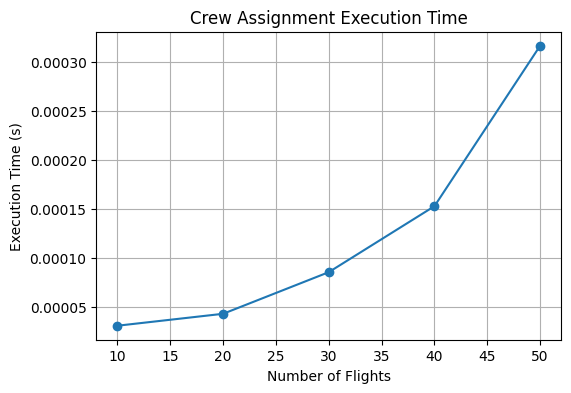

In [59]:


sizes = [10, 20, 30, 40, 50]
times = time_experiment(sizes)
plot_execution(sizes, times)

In [60]:
flights = [
    ('F1', 9, 11),
    ('F2', 10, 12),
    ('F3', 13, 15),
    ('F4', 11, 14),
    ('F5', 16, 18)
]

crew_members = ['C1', 'C2', 'C3']
MIN_REST = 1   # hours


In [61]:
def valid_assignment(assigned_flights, new_flight):
    """Check if new_flight can be assigned without violating constraints."""
    nf_id, ns, ne = new_flight

    for f_id, s, e in assigned_flights:
        # Overlap
        if not (ne + MIN_REST <= s or e + MIN_REST <= ns):
            return False
    return True


In [62]:
def schedule_flights(flights, crew_members):
    result = {c: [] for c in crew_members}

    def backtrack(i):
        if i == len(flights):
            return True

        flight = flights[i]

        for crew in crew_members:
            if valid_assignment(result[crew], flight):
                result[crew].append(flight)

                if backtrack(i + 1):
                    return True

                result[crew].pop()

        return False
    
    backtrack(0)
    return result


In [63]:
assignment = schedule_flights(flights, crew_members)
assignment


{'C1': [('F1', 9, 11), ('F3', 13, 15), ('F5', 16, 18)],
 'C2': [('F2', 10, 12)],
 'C3': [('F4', 11, 14)]}

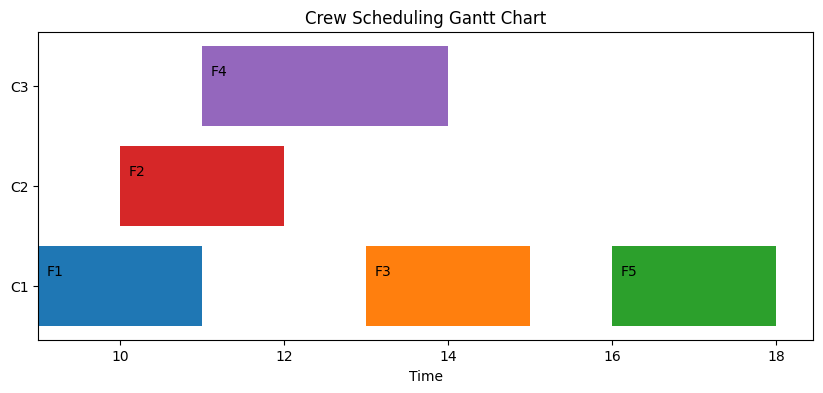

In [64]:
def plot_gantt(assignment):
    fig, ax = plt.subplots(figsize=(10, 4))

    yticks = []
    ylabels = []
    y = 0

    for crew, flights in assignment.items():
        for f_id, s, e in flights:
            ax.barh(y, e - s, left=s)
            ax.text(s + 0.1, y + 0.1, f_id)
        yticks.append(y)
        ylabels.append(crew)
        y += 1

    ax.set_yticks(yticks)
    ax.set_yticklabels(ylabels)
    ax.set_xlabel("Time")
    ax.set_title("Crew Scheduling Gantt Chart")
    plt.show()

plot_gantt(assignment)


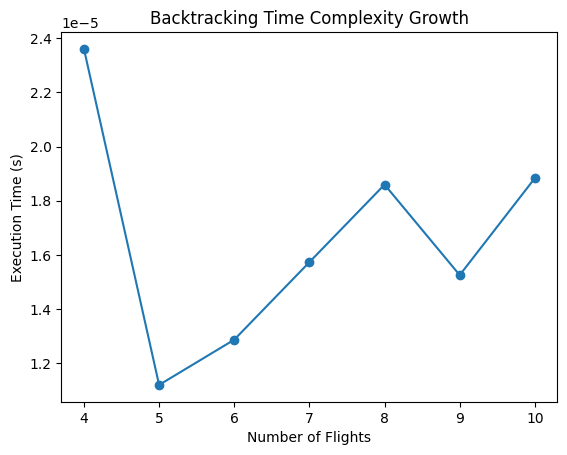

In [65]:
def test_scaling(max_flights=10):
    times = []
    sizes = []

    for n in range(4, max_flights + 1):
        sample_flights = [
            (f"F{i}", i*2, i*2 + 2) for i in range(n)
        ]

        start = time.time()
        schedule_flights(sample_flights, crew_members)
        end = time.time()

        times.append(end - start)
        sizes.append(n)

    return sizes, times


sizes, times = test_scaling()

plt.plot(sizes, times, marker='o')
plt.xlabel("Number of Flights")
plt.ylabel("Execution Time (s)")
plt.title("Backtracking Time Complexity Growth")
plt.show()


✅ ANALYSIS SECTION

---

# **Why is Airline Crew Scheduling NP-Hard?**

Airline Crew Scheduling is considered **NP-hard** because it combines multiple complex decision-making components such as time overlaps, rest constraints, and resource limitations. Solving the problem requires searching through a large number of possible assignments to find a valid schedule.

The problem closely resembles other well-known NP-hard problems:

### **1. Graph Coloring**

* Flights can be treated as nodes.
* Edges represent overlapping flights.
* Assigning crew members is equivalent to coloring nodes with minimum colors.
* Graph coloring is a known NP-hard problem.

### **2. Set Partitioning**

* We must partition the set of flights across available crew members.
* Each partition must satisfy constraints such as no overlap and minimum rest time.
* Set partitioning with constraints is NP-hard.

### **3. Constraint Satisfaction Problems (CSPs)**

* Crew scheduling is a CSP involving temporal constraints.
* CSPs with time intervals and resource limits are NP-hard.

Because it combines these challenges, **finding an exact solution requires exploring an exponentially growing number of possibilities**, making it NP-hard.

---

# **Why Does Backtracking Work Only for Small Inputs?**

Backtracking tries all possible combinations of flight–crew assignments.
As the number of flights increases, the number of combinations grows exponentially.

### **Time Complexity**

[
O(k \times 2^n)
]
where:

* **n** = number of flights
* **k** = number of crew members

### **Explanation**

* Each flight can go to any crew member → exponential branching.
* If any partial assignment violates constraints, the algorithm backtracks and tries another path.
* For large values of **n**, this leads to:

  * Very high computation time
  * Huge recursion depth
  * Slow or infeasible execution

Thus, **backtracking is suitable only for small-scale scheduling problems** (e.g., 10–12 flights).

---

# **Real-World Optimization Techniques**

Actual airlines manage **hundreds to thousands of flights and crew**, which is far beyond what backtracking can handle.
Therefore, real systems use more advanced, optimized techniques:

---

## **1. Integer Linear Programming (ILP)**

* Formulates crew assignments as linear constraints.
* Finds optimal solutions using solvers like CPLEX or Gurobi.
* Very effective for large scheduling problems.

---

## **2. Branch and Bound**

* Systematically explores solution space.
* Prunes (cuts off) branches that cannot lead to optimal solutions.
* Much faster than brute-force backtracking.

---

## **3. Heuristics & Greedy Algorithms**

* Prioritize certain flights first (e.g., longest or earliest flights).
* Reduce complexity by following intelligent rules.
* Provide good (not always optimal) solutions.

---

## **4. Google OR-Tools**

* Highly optimized optimization library by Google.
* Uses constraint programming + search strategies.
* Widely used in transport and logistics scheduling.

---

## **5. Metaheuristics**

These approaches explore the solution space more intelligently:

### **Genetic Algorithms (GA)**

* Mimic natural selection.
* Good for very large search spaces.

### **Simulated Annealing**

* Tries random modifications and accepts them based on probability.
* Helps escape local minima.

### **Tabu Search**

* Maintains a “tabu list” of moves to avoid cycles.
* Efficient for complex, constrained problems.

---

# **Summary**

Airline Crew Scheduling is NP-hard because it requires solving overlapping constraints similar to graph coloring, set partitioning, and constraint satisfaction. Backtracking works only for small inputs due to exponential time complexity, and real-world systems rely on sophisticated optimization techniques like ILP, heuristics, OR-Tools, and metaheuristics.

---

